##### Dependencies

In [38]:
import numpy as np

from sklearn import datasets
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

##### DRY

In [39]:
# Metrics

def show_confusion_matrix(Y_test, Y_pred, labels):
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()


def plot_roc_curve(dataset):
    X = dataset.data
    y = dataset.target
    target_names = dataset.target_names

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    # Binarize the target classes
    Y_test = label_binarize(y_test, classes=np.unique(y))
    n_classes = Y_test.shape[1]

    # Fit the k-nearest neighbors model
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Predict the test set probabilities
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(target_names[i], roc_auc[i]))

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)

    # Set plot parameters
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {0} dataset'.format(dataset['DESCR'].split('\n')[0]))
    plt.legend(loc="lower right")
    plt.show()

# Assignment 1 - Classification

### k-Nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.60      0.75      0.67         4
           2       0.67      0.50      0.57         4

    accuracy                           0.80        15
   macro avg       0.76      0.75      0.75        15
weighted avg       0.80      0.80      0.80        15



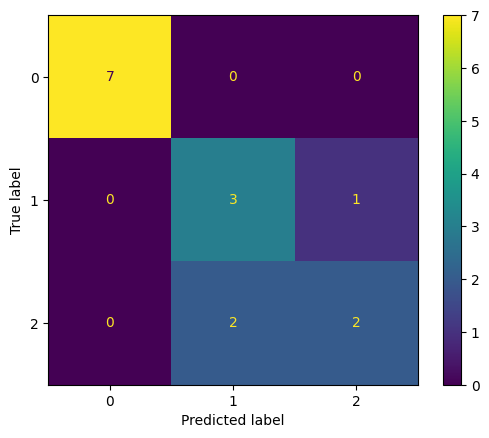

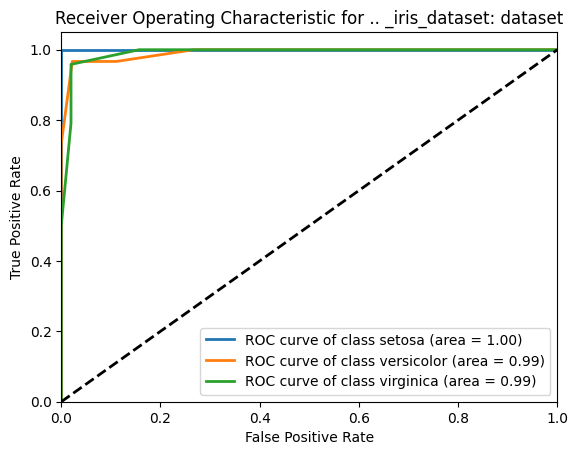

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.64      1.00      0.78         7
           2       1.00      0.43      0.60         7

    accuracy                           0.78        18
   macro avg       0.88      0.81      0.79        18
weighted avg       0.86      0.78      0.76        18



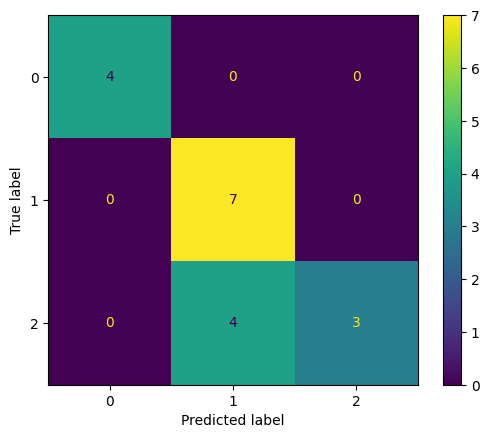

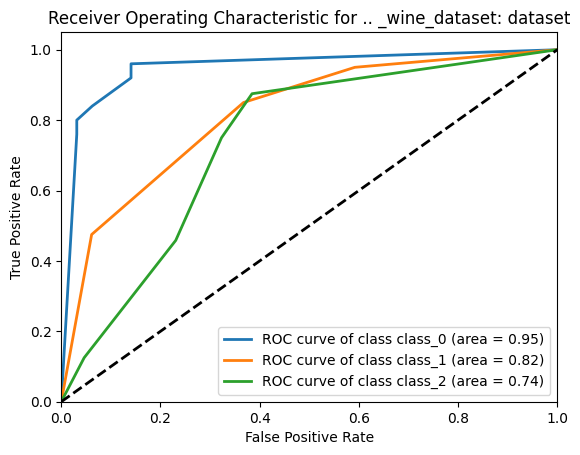

              precision    recall  f1-score   support

           0       0.10      1.00      0.18        15
           1       0.00      0.00      0.00        21
           2       0.13      0.15      0.14        13
           3       0.17      0.12      0.14        16
           4       0.00      0.00      0.00        23
           5       1.00      0.04      0.07        26
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11

    accuracy                           0.11       180
   macro avg       0.14      0.13      0.05       180
weighted avg       0.18      0.11      0.05       180



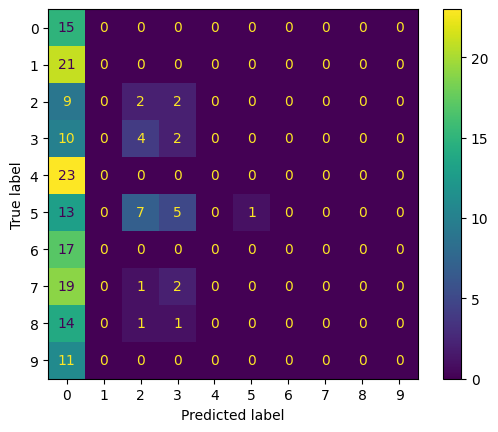

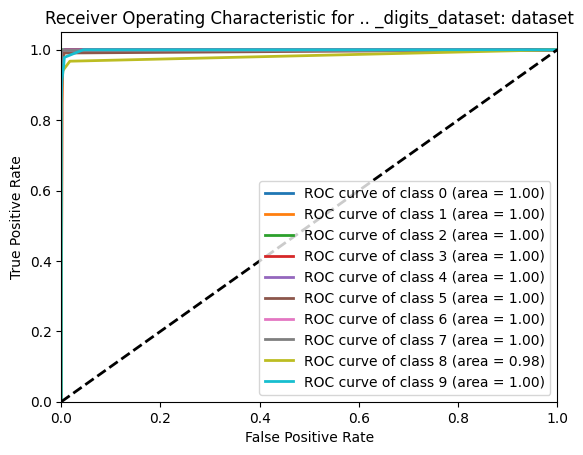

In [40]:
def k_nearest_neighbors(dataset, neighbors=5):
    X = dataset.data[:, :2]
    Y = dataset.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)


    show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

    target_names = [str(x) for x in knn.classes_]
    print(classification_report(Y_test, Y_pred, target_names=target_names, zero_division=0))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
k_nearest_neighbors(iris, neighbors=5)

wine = datasets.load_wine()
k_nearest_neighbors(wine, neighbors=5)

digits = datasets.load_digits()
k_nearest_neighbors(digits, neighbors=5)

##### Not my code for visualisation:

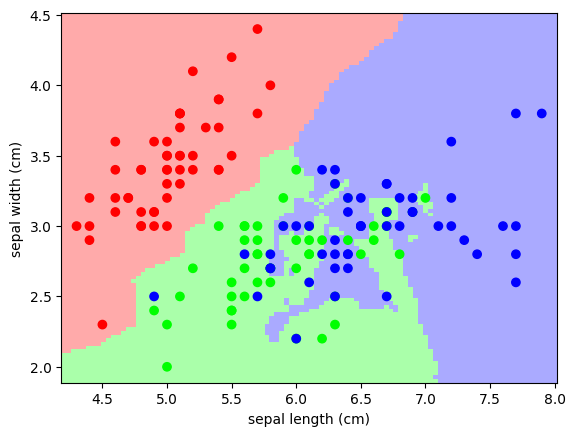

In [20]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn()

### Support Vector Machines

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



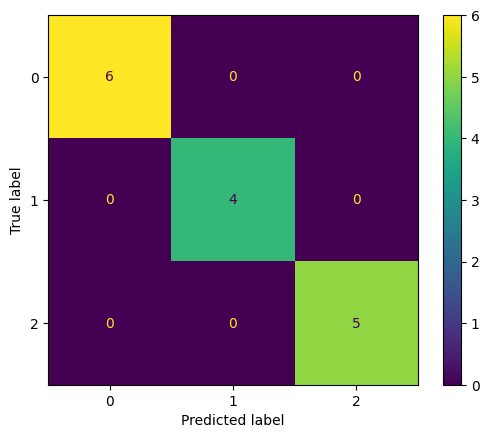

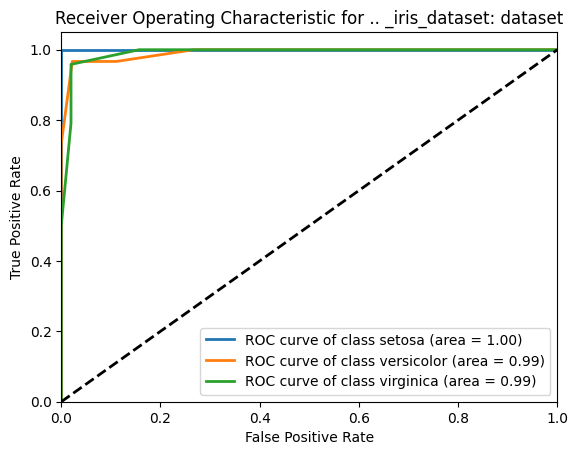

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92         7
           2       0.67      1.00      0.80         2

    accuracy                           0.94        18
   macro avg       0.89      0.95      0.91        18
weighted avg       0.96      0.94      0.95        18



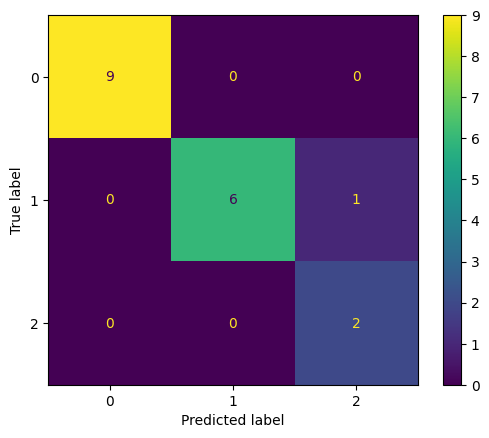

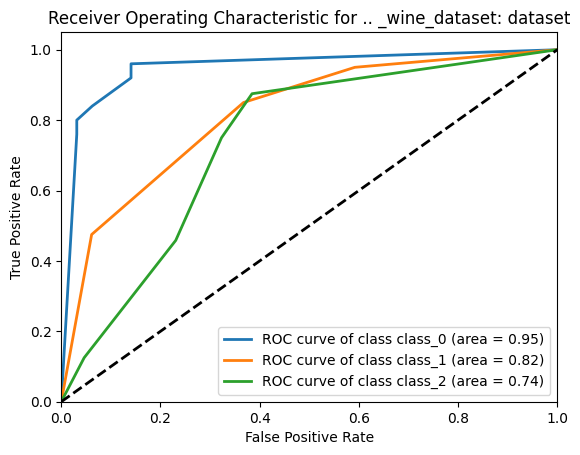

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        16
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        17
           5       0.95      0.95      0.95        20
           6       1.00      1.00      1.00        14
           7       0.95      1.00      0.97        19
           8       1.00      1.00      1.00        11
           9       0.96      0.96      0.96        23

    accuracy                           0.98       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.98      0.98      0.98       180



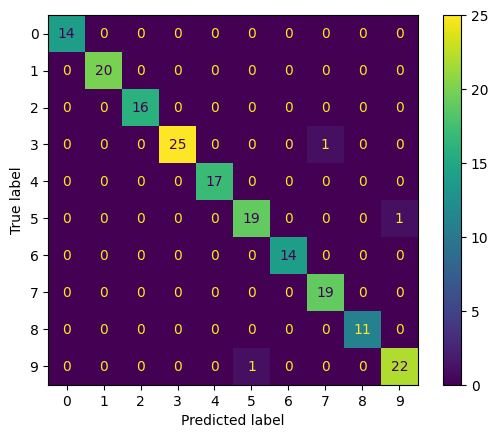

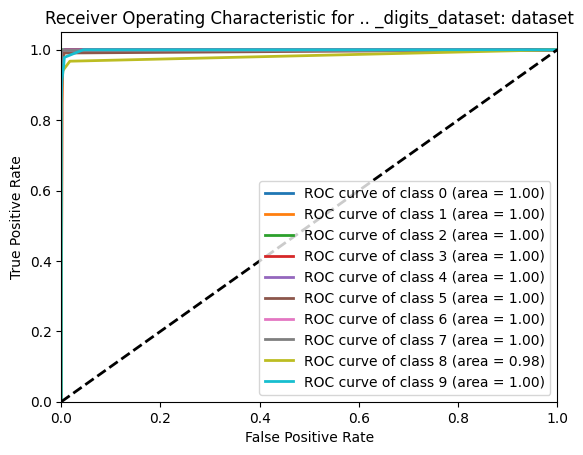

In [41]:
def svm_on_dataset(dataset, kernel='linear'):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = svm.SVC(kernel=kernel, C=1.0, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
svm_on_dataset(iris)

wine = datasets.load_wine()
svm_on_dataset(wine)

digits = datasets.load_digits()
svm_on_dataset(digits)

### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.83      0.91         6
           2       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15



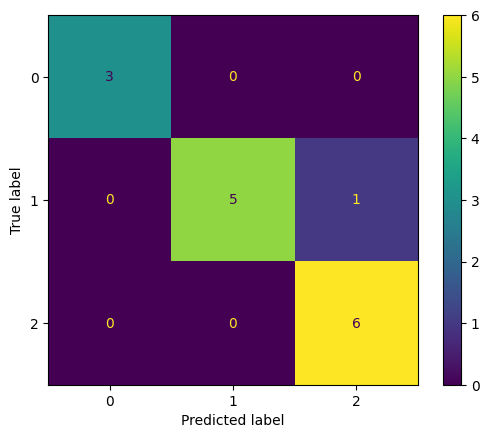

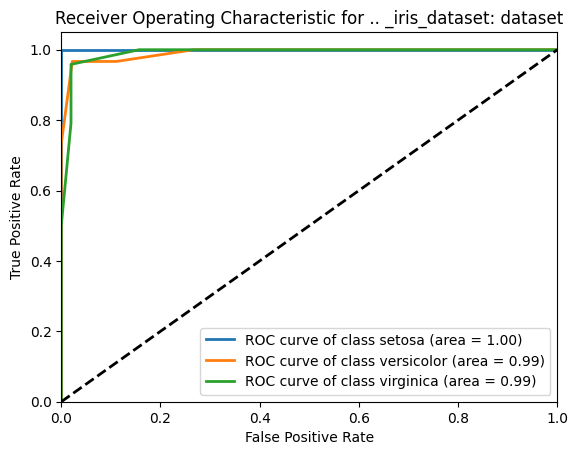

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.88      0.78      0.82         9
           2       1.00      0.67      0.80         3

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.83        18
weighted avg       0.85      0.83      0.83        18



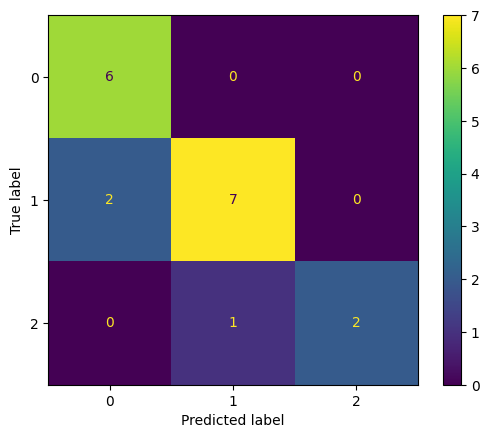

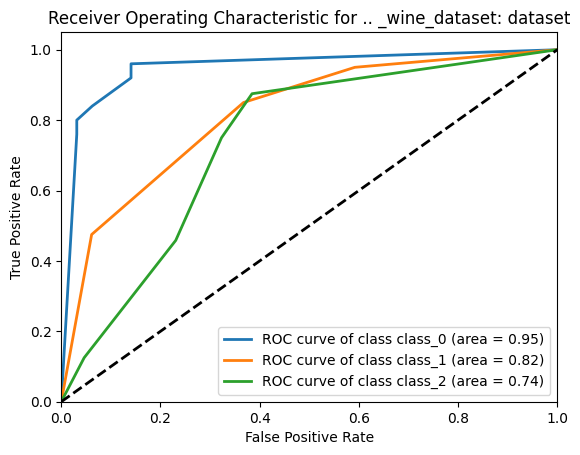

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.95      0.90        20
           2       1.00      0.86      0.92        14
           3       0.89      0.89      0.89        19
           4       0.87      1.00      0.93        13
           5       0.90      0.95      0.93        20
           6       1.00      0.95      0.98        22
           7       0.96      0.86      0.91        28
           8       0.77      0.91      0.83        11
           9       0.87      0.83      0.85        24

    accuracy                           0.91       180
   macro avg       0.91      0.92      0.91       180
weighted avg       0.92      0.91      0.91       180



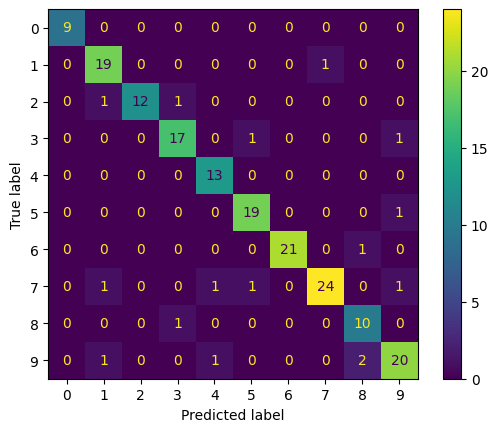

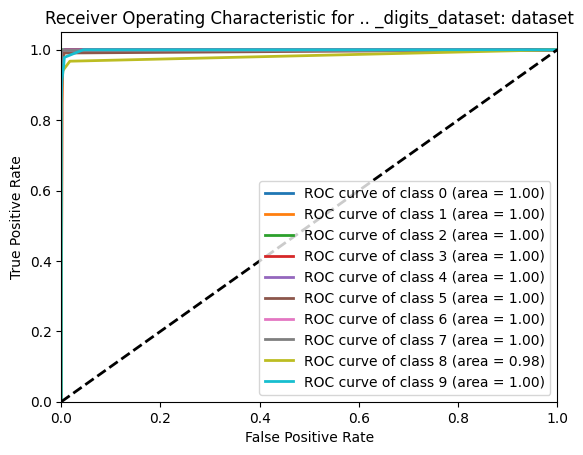

In [42]:
def decision_tree_on_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
decision_tree_on_dataset(iris)

wine = datasets.load_wine()
decision_tree_on_dataset(wine)

digits = datasets.load_digits()
decision_tree_on_dataset(digits)

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



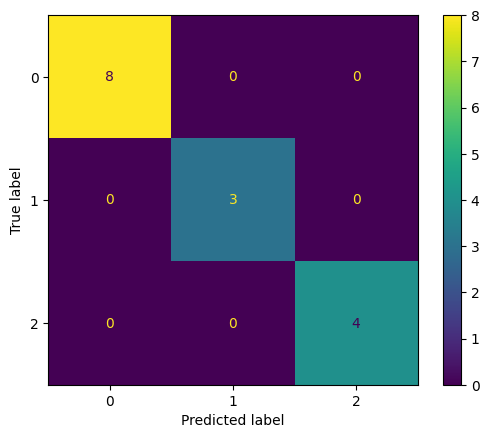

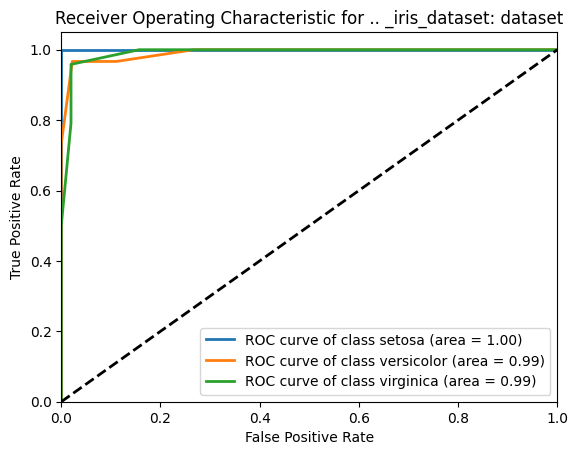

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



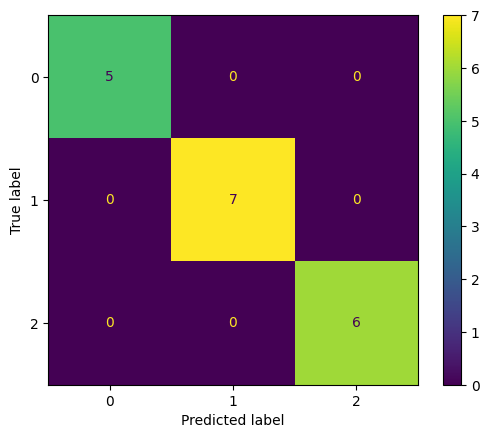

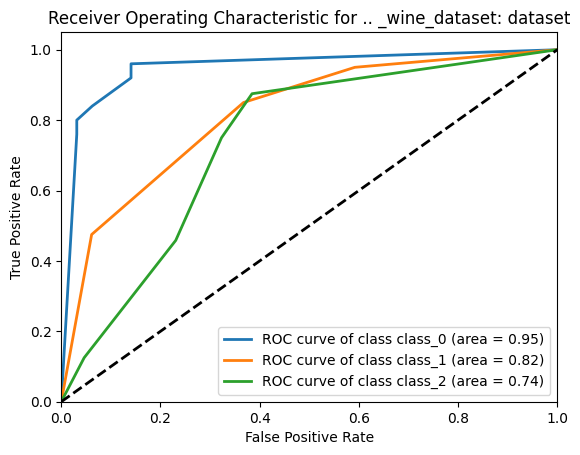

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.60      0.75      0.67        12
           2       0.86      0.86      0.86        21
           3       0.71      0.94      0.81        18
           4       0.55      0.75      0.63         8
           5       1.00      0.77      0.87        26
           6       0.76      1.00      0.87        13
           7       0.70      0.94      0.80        17
           8       1.00      0.33      0.50        27
           9       0.86      0.82      0.84        22

    accuracy                           0.78       180
   macro avg       0.78      0.80      0.76       180
weighted avg       0.82      0.78      0.77       180



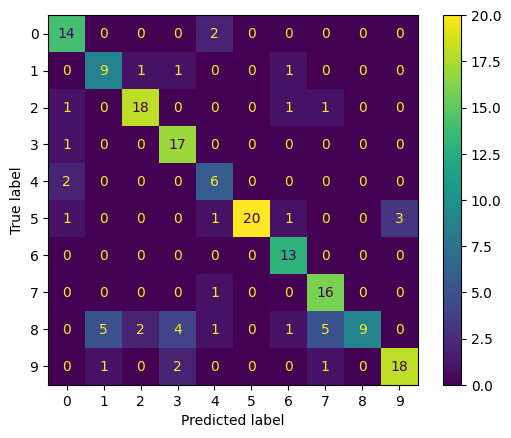

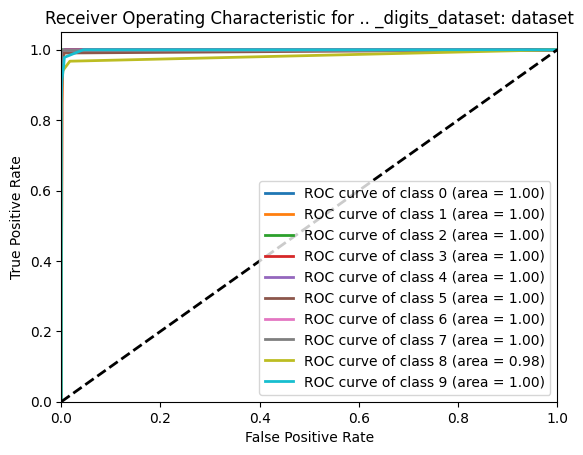

In [43]:
def random_forest_on_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    fst = RandomForestClassifier(max_depth=2, random_state=0)
    fst.fit(X_train, Y_train)
    Y_pred = fst.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
random_forest_on_dataset(iris)

wine = datasets.load_wine()
random_forest_on_dataset(wine)

digits = datasets.load_digits()
random_forest_on_dataset(digits)

# Assignment 2 - Clustering

# Assignment 3 - Real World Data Classification

                 precision    recall  f1-score   support

tested_negative       0.83      0.81      0.82       107
tested_positive       0.59      0.62      0.60        47

       accuracy                           0.75       154
      macro avg       0.71      0.72      0.71       154
   weighted avg       0.76      0.75      0.75       154



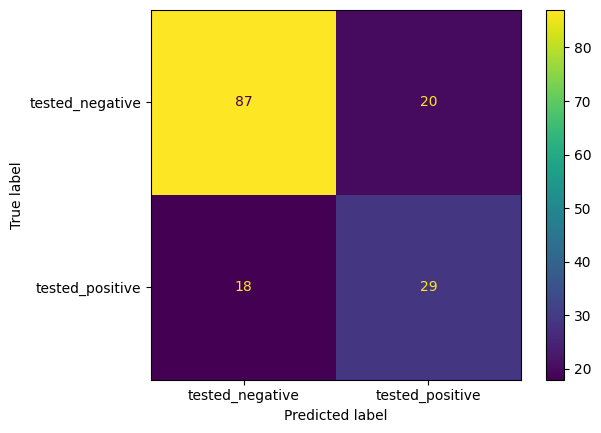

In [44]:
df = pd.read_csv("dataset_37_diabetes.csv")

diabetic_patients = len(df[df['\'class\''] == "tested_positive"])
healthy_patients = len(df[df['\'class\''] == "tested_negative"])

X = df.drop(['\'class\''], axis=1)
Y = df['\'class\'']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)


show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

target_names = [str(x) for x in knn.classes_]
print(classification_report(Y_test, Y_pred, target_names=target_names, zero_division=0))